In [190]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift
from scipy.signal.windows import hamming, hann, gaussian, kaiser

In [26]:
omega_r = 0.0224018
omega_phi = 0.031232

# timeseries data

In [ ]:
m = 2
data = np.loadtxt(
    f"../test/output_data/output_data_m{m}.dat"
)

In [ ]:
t, r, theta, phi, RePhi, ImPhi = data.T
Phi = RePhi + 1j * ImPhi
Phi_n = Phi * np.exp(1j * m * omega_phi * t)
Phi_n_window = (Phi_n - np.mean(Phi_n)) * hann(len(Phi_n))

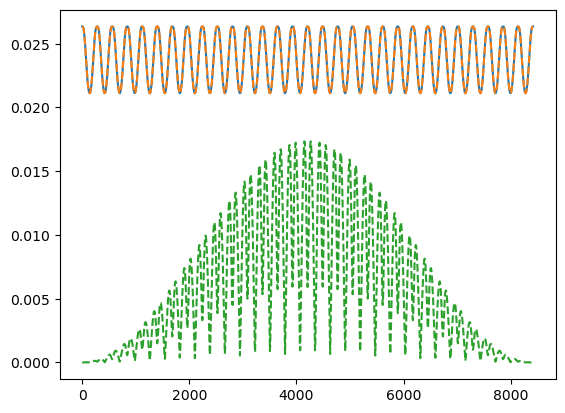

In [ ]:
plt.plot(t, np.abs(Phi))
plt.plot(t, np.abs(Phi_n), ls="--")
plt.plot(t, np.abs(Phi_n_window), ls="--")
plt.show()

In [ ]:
dt = t[1] - t[0]
Phi_fd = fftshift(fft(Phi_n_window)) * dt
f = fftshift(fftfreq(len(t), dt))

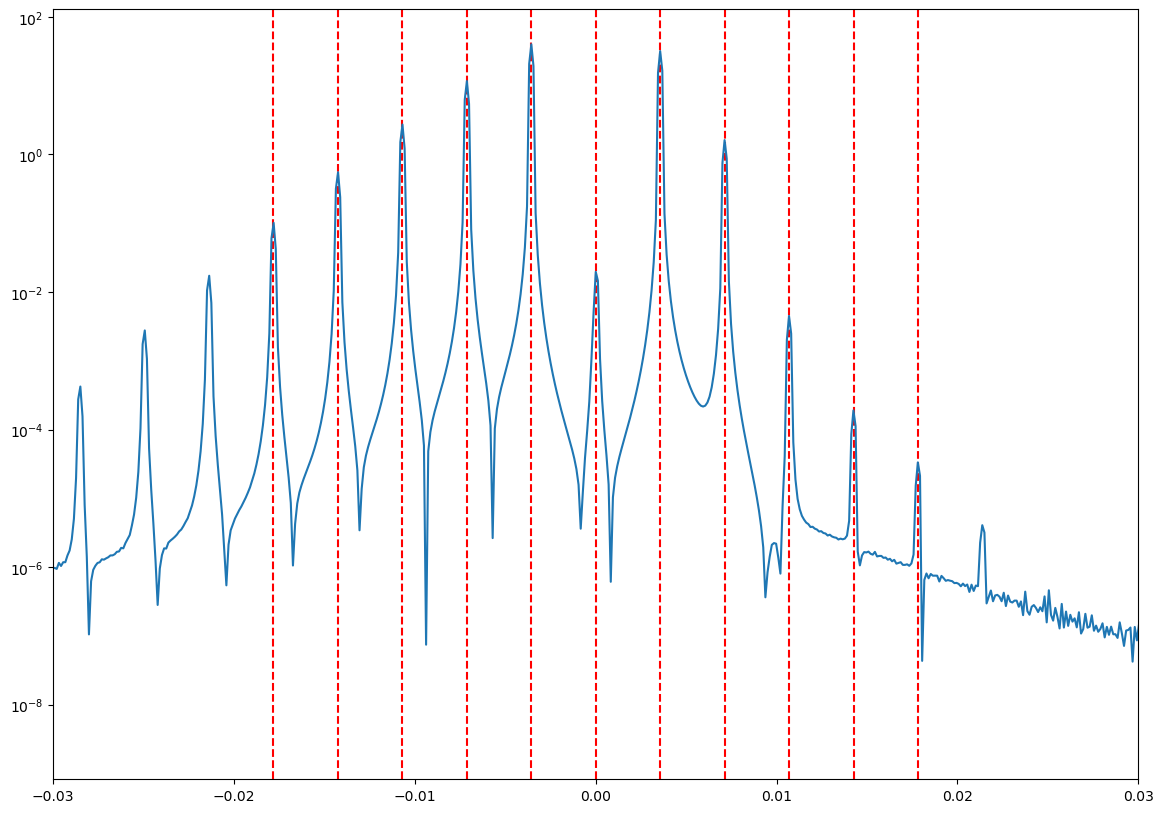

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(f, np.abs(Phi_fd), zorder=1)
[
    plt.axvline(x=(n * omega_r) / (2.0 * np.pi), c="r", zorder=0, ls="--")
    for n in range(-5, 6)
]

plt.yscale("log")
plt.xlim(-0.03, 0.03)
plt.show()

# chi data

In [ ]:
m = 0
data = np.loadtxt(
    f"../test/output_data/output_data_chi_m{m}.dat"
)

In [ ]:
chi, r, theta, phi, RePhi, ImPhi = data.T
Phi = RePhi + 1j * ImPhi

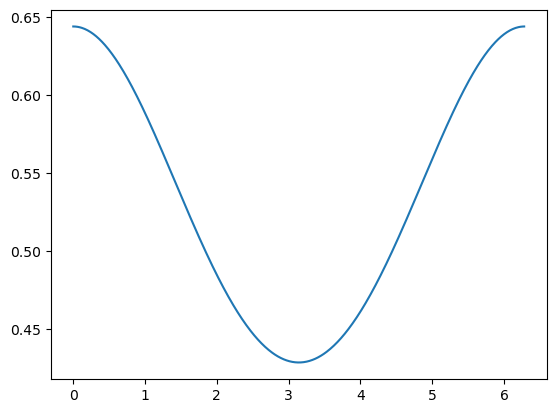

In [ ]:
plt.plot(chi, np.abs(Phi))
plt.show()

In [274]:
np.abs(np.trapezoid(Phi, x=chi))

np.float64(3.3423895755650816)